In [61]:
import bw2data as bd
import bw2io as bi
import bw2calc as bc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [62]:
name_project = 'stainless_steel'
bd.projects.set_current(name_project)

#Setting database

if 'ecoinvent-3.9.1-cutoff' in bd.databases:
    print('ecoinvent 3.9.1 is already present in the project')
else:
    bi.import_ecoinvent_release(
        version='3.9.1',
        system_model='cutoff', # can be cutoff / apos / consequential / EN15804
        username='precon6380',
        password='VpmJ4QB8Yn'
    )

ecoinvent 3.9.1 is already present in the project


In [77]:
path_act = r'C:\Users\sotoale\Documents\Python\activities.csv'
path_meth = r'C:\Users\sotoale\Documents\Python\methodes.csv'

df_activities = pd.read_csv(path_act, dtype={'activity_id': 'Int64'})
df_methods = pd.read_csv(path_meth)

In [110]:
dic_activities = df_activities.set_index('variable').to_dict(orient='index')
dic_activities

{'acier_prefini': {'unit': 'kilogram',
  'location': 'RER',
  'activity_id': 206853134430044160},
 'acier_lamine': {'unit': 'kilogram',
  'location': 'RER',
  'activity_id': 206853083444084737},
 'fab_pieces': {'unit': 'hour',
  'location': 'RER',
  'activity_id': 206853189195071488},
 'construction': {'unit': 'hour',
  'location': 'GLO',
  'activity_id': 206853116566503424},
 'desinstallation_pieux': {'unit': nan, 'location': nan, 'activity_id': None}}

In [194]:
act = bd.get_activity(206853116566503424)
act

'machine operation, diesel, >= 18.64 kW and < 74.57 kW, steady-state' (hour, GLO, None)

In [116]:
import ast

methods = df_methods['Method']  # Série pandas com strings de tuplas
listtupla = []

for element in methods:
    tupla = ast.literal_eval(element)  # converte string para tupla real
    listtupla.append(tupla)

listtupla

[('ecoinvent-3.9.1',
  'EF v3.1 EN15804',
  'climate change',
  'global warming potential (GWP100)'),
 ('ecoinvent-3.9.1',
  'EF v3.1 EN15804',
  'material resources: metals/minerals',
  'abiotic depletion potential (ADP): elements (ultimate reserves)'),
 ('ecoinvent-3.9.1',
  'EF v3.1 EN15804',
  'energy resources: non-renewable',
  'abiotic depletion potential (ADP): fossil fuels'),
 ('ecoinvent-3.9.1',
  'EF v3.1 EN15804',
  'water use',
  'user deprivation potential (deprivation-weighted water consumption)'),
 ('ecoinvent-3.9.1',
  'EF v3.1 EN15804',
  'eutrophication: freshwater',
  'fraction of nutrients reaching freshwater end compartment (P)'),
 ('ecoinvent-3.9.1',
  'EF v3.1 EN15804',
  'ecotoxicity: freshwater',
  'comparative toxic unit for ecosystems (CTUe)')]

In [117]:
config = {
    "impact_categories": listtupla
}
config


{'impact_categories': [('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'climate change',
   'global warming potential (GWP100)'),
  ('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'material resources: metals/minerals',
   'abiotic depletion potential (ADP): elements (ultimate reserves)'),
  ('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'energy resources: non-renewable',
   'abiotic depletion potential (ADP): fossil fuels'),
  ('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'water use',
   'user deprivation potential (deprivation-weighted water consumption)'),
  ('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'eutrophication: freshwater',
   'fraction of nutrients reaching freshwater end compartment (P)'),
  ('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'ecotoxicity: freshwater',
   'comparative toxic unit for ecosystems (CTUe)')]}

In [201]:
functional_units = {
    'acier_prefini':   {dic_activities['acier_prefini']['activity_id']: 4000}, #Kg d'acier
    'acier_lamine':    {dic_activities['acier_lamine']['activity_id']: 3760}, #Kg d'acier
    'fab_pieces':      {dic_activities['fab_pieces']['activity_id']: 20}, #heurs d'usage de machine
    'construction':    {dic_activities['construction']['activity_id']: 10}, #heures d'usage
}

functional_units

{'acier_prefini': {206853134430044160: 4000},
 'acier_lamine': {206853083444084737: 3760},
 'fab_pieces': {206853189195071488: 20},
 'construction': {206853116566503424: 10}}

In [202]:
data_objs = bd.get_multilca_data_objs(functional_units=functional_units, method_config=config)

In [203]:
mlca = bc.MultiLCA(demands=functional_units, method_config=config, data_objs=data_objs)
mlca.lci()
mlca.lcia()
mlca.scores

{(('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'climate change',
   'global warming potential (GWP100)'),
  'acier_prefini'): 18621.681279966637,
 (('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'climate change',
   'global warming potential (GWP100)'),
  'acier_lamine'): 19536.467673887393,
 (('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'climate change',
   'global warming potential (GWP100)'),
  'fab_pieces'): 503.73428619395725,
 (('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'climate change',
   'global warming potential (GWP100)'),
  'construction'): 216.4467181736797,
 (('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'material resources: metals/minerals',
   'abiotic depletion potential (ADP): elements (ultimate reserves)'),
  'acier_prefini'): 0.5024964608658483,
 (('ecoinvent-3.9.1',
   'EF v3.1 EN15804',
   'material resources: metals/minerals',
   'abiotic depletion potential (ADP): elements (ultimate reserves)'),
  'acier_lamine'): 0.47403251675242886,
 (('ecoinvent-3.9.1',
   'EF

In [204]:
dfresults = pd.DataFrame.from_dict(mlca.scores, orient='index').reset_index()
dfresults

,index,0
0,"((ecoinvent-3.9.1, EF v3.1 EN15804, climate ch...",18621.681280
1,"((ecoinvent-3.9.1, EF v3.1 EN15804, climate ch...",19536.467674
2,"((ecoinvent-3.9.1, EF v3.1 EN15804, climate ch...",503.734286
3,"((ecoinvent-3.9.1, EF v3.1 EN15804, climate ch...",216.446718
4,"((ecoinvent-3.9.1, EF v3.1 EN15804, material r...",0.502496
5,"((ecoinvent-3.9.1, EF v3.1 EN15804, material r...",0.474033
6,"((ecoinvent-3.9.1, EF v3.1 EN15804, material r...",0.009327
7,"((ecoinvent-3.9.1, EF v3.1 EN15804, material r...",0.000077
8,"((ecoinvent-3.9.1, EF v3.1 EN15804, energy res...",214558.849045
9,"((ecoinvent-3.9.1, EF v3.1 EN15804, energy res...",219351.272504


In [205]:
# 1. Convertir diccionario en DataFrame, orientado por índice
dfresults = pd.DataFrame.from_dict(mlca.scores, orient='index').reset_index()

# Al hacer reset_index(), deberías tener:
# 'index' (el índice original compuesto),
# y una o varias columnas con los valores (normalmente solo una).

print(dfresults.columns)  # para ver nombres de columnas

# 2. Separar la tupla externa (columna 'index') en dos partes:
dfresults[['meta_info', 'actividad']] = pd.DataFrame(dfresults['index'].tolist(), index=dfresults.index)

# 3. Separar la tupla interna (meta_info) en sus partes:
dfresults[['proveedor', 'metodo', 'categoria', 'indicador']] = pd.DataFrame(dfresults['meta_info'].tolist(), index=dfresults.index)

# 4. Verificar cuál es la columna con los valores:
valor_colname = dfresults.columns.difference(['index', 'meta_info', 'actividad', 'proveedor', 'metodo', 'categoria', 'indicador'])[0]

# 5. Crear DataFrame final con solo lo necesario:
df_final = dfresults[['categoria', 'indicador', 'actividad', valor_colname]].copy()
df_final.columns = ['categoria', 'indicador', 'actividad', 'valor']

df_final


Index(['index', 0], dtype='object')


,categoria,indicador,actividad,valor
0,climate change,global warming potential (GWP100),acier_prefini,18621.681280
1,climate change,global warming potential (GWP100),acier_lamine,19536.467674
2,climate change,global warming potential (GWP100),fab_pieces,503.734286
3,climate change,global warming potential (GWP100),construction,216.446718
4,material resources: metals/minerals,abiotic depletion potential (ADP): elements (u...,acier_prefini,0.502496
5,material resources: metals/minerals,abiotic depletion potential (ADP): elements (u...,acier_lamine,0.474033
6,material resources: metals/minerals,abiotic depletion potential (ADP): elements (u...,fab_pieces,0.009327
7,material resources: metals/minerals,abiotic depletion potential (ADP): elements (u...,construction,0.000077
8,energy resources: non-renewable,abiotic depletion potential (ADP): fossil fuels,acier_prefini,214558.849045
9,energy resources: non-renewable,abiotic depletion potential (ADP): fossil fuels,acier_lamine,219351.272504


In [206]:
# Paso 1: total por categoria
totales = df_final.groupby('categoria')['valor'].transform('sum')

# Paso 2: porcentaje para cada fila
df_final['porcentaje_contribucion'] = df_final['valor'] / totales * 100

# Mostrar resultado
df_final


,categoria,indicador,actividad,valor,porcentaje_contribucion
0,climate change,global warming potential (GWP100),acier_prefini,18621.681280,47.897328
1,climate change,global warming potential (GWP100),acier_lamine,19536.467674,50.250275
2,climate change,global warming potential (GWP100),fab_pieces,503.734286,1.295669
3,climate change,global warming potential (GWP100),construction,216.446718,0.556728
4,material resources: metals/minerals,abiotic depletion potential (ADP): elements (u...,acier_prefini,0.502496,50.966624
5,material resources: metals/minerals,abiotic depletion potential (ADP): elements (u...,acier_lamine,0.474033,48.079616
6,material resources: metals/minerals,abiotic depletion potential (ADP): elements (u...,fab_pieces,0.009327,0.945969
7,material resources: metals/minerals,abiotic depletion potential (ADP): elements (u...,construction,0.000077,0.007791
8,energy resources: non-renewable,abiotic depletion potential (ADP): fossil fuels,acier_prefini,214558.849045,47.920574
9,energy resources: non-renewable,abiotic depletion potential (ADP): fossil fuels,acier_lamine,219351.272504,48.990936


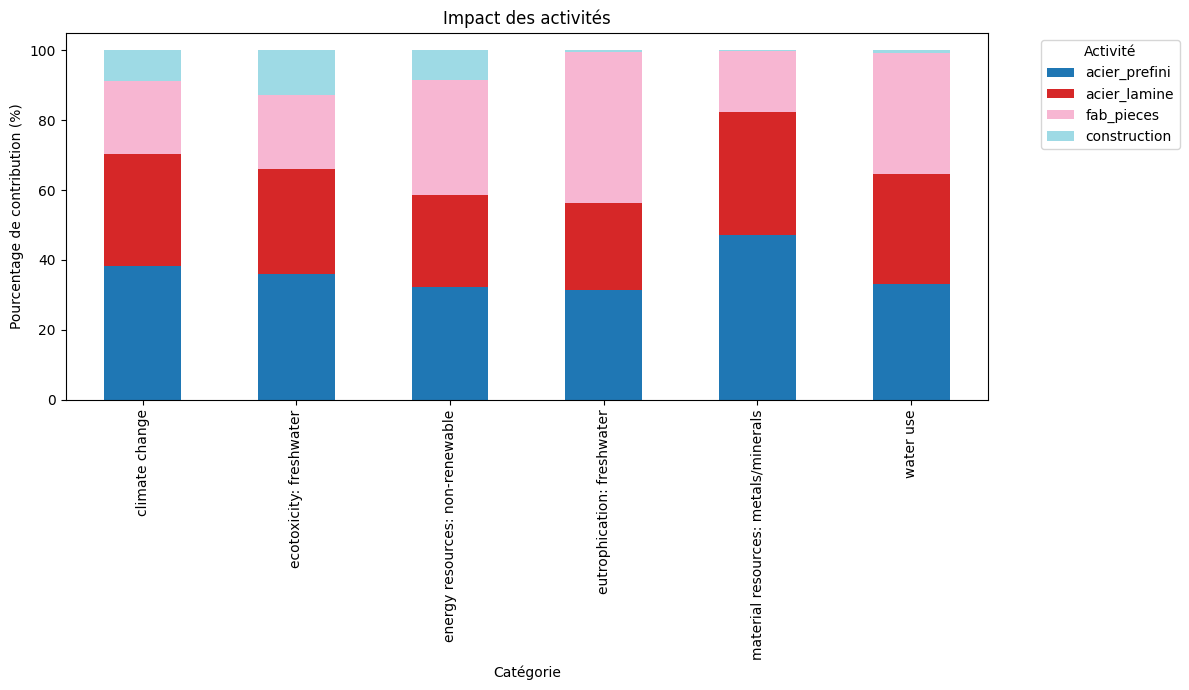

In [200]:
# Paso 1: obtener el orden original de actividades
orden_actividades = df_final['actividad'].unique().tolist()

# Paso 2: pivotar la tabla
df_pivot = df_final.pivot_table(
    index='categoria',
    columns='actividad',
    values='porcentaje_contribucion',
    fill_value=0
)

# Paso 3: reordenar columnas para conservar orden original
df_pivot = df_pivot[orden_actividades]

# Paso 4: graficar
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
ax.set_ylabel("Pourcentage de contribution (%)")
ax.set_xlabel("Catégorie")
ax.set_title("Impact des activités")
ax.legend(title="Activité", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [187]:
df_pivot

actividad,acier_prefini,acier_lamine,fab_pieces,construction
categoria,,,,
climate change,38.306042,32.064749,20.724301,8.904907
ecotoxicity: freshwater,36.074107,30.061653,20.993505,12.870735
energy resources: non-renewable,32.209255,26.272888,33.028926,8.488931
eutrophication: freshwater,31.313295,24.888290,43.187877,0.610538
material resources: metals/minerals,47.015780,35.387688,17.452784,0.143748
water use,33.098154,31.450343,34.574733,0.876771
